In [1]:
%load_ext autoreload
%autoreload 2
import ctvis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
%matplotlib inline

## データのpathをDataFrameにする
カラム：FilePathImage, FileName, FilePathMask

In [2]:
df = ctvis.get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,covid-data/rp_im/1.nii.gz,1.nii.gz,covid-data/rp_msk/1.nii.gz
1,covid-data/rp_im/2.nii.gz,2.nii.gz,covid-data/rp_msk/2.nii.gz
2,covid-data/rp_im/3.nii.gz,3.nii.gz,covid-data/rp_msk/3.nii.gz
3,covid-data/rp_im/4.nii.gz,4.nii.gz,covid-data/rp_msk/4.nii.gz
4,covid-data/rp_im/5.nii.gz,5.nii.gz,covid-data/rp_msk/5.nii.gz
5,covid-data/rp_im/6.nii.gz,6.nii.gz,covid-data/rp_msk/6.nii.gz
6,covid-data/rp_im/7.nii.gz,7.nii.gz,covid-data/rp_msk/7.nii.gz
7,covid-data/rp_im/8.nii.gz,8.nii.gz,covid-data/rp_msk/8.nii.gz
8,covid-data/rp_im/9.nii.gz,9.nii.gz,covid-data/rp_msk/9.nii.gz


## NIfTIデータをNumPy Arrayとしてロードする

In [3]:
sample_path = df['FilePathImage'].iloc[0]
data = ctvis.load_nifti(sample_path)

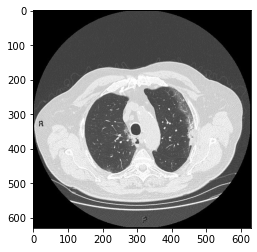

In [4]:
plt.imshow(data[:, :, 10], cmap='gray')

## マスクデータをRGBにする

In [5]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)

In [6]:
mask_color = ctvis.label_color(seg_data)

In [7]:
mask_color.shape

(630, 630, 45, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


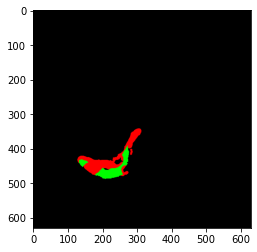

In [8]:
plt.imshow(mask_color[:, :, 40])

## CTデータをHUからグレースケールに変換する

In [9]:
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [10]:
volume.shape

(630, 630, 45)

In [11]:
mask.shape

(630, 630, 45)

In [12]:
mask_color.shape

(630, 630, 45, 3)

In [13]:
maxhu = np.max(volume)
minhu = np.min(volume)
volume_range = (volume - minhu) / max((maxhu - minhu), 1e-3)
volume_range = volume_range * 255
volume_range = np.stack([volume_range, volume_range, volume_range], axis=-1)

In [14]:
volume_gray = ctvis.hu_to_gray(volume)